### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
data.info()
print("Dataset Shape:", data.shape)
print("\nColumn Names:")
print(data.columns.tolist())
print("\nData Types:")
print(data.dtypes)
print("\nBasic Statistics:")
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

Investigate missing data columns and decide how to fix missing data.

Missing values per column:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

Total missing values: 13370
Percentage of total data missing: 4.05%


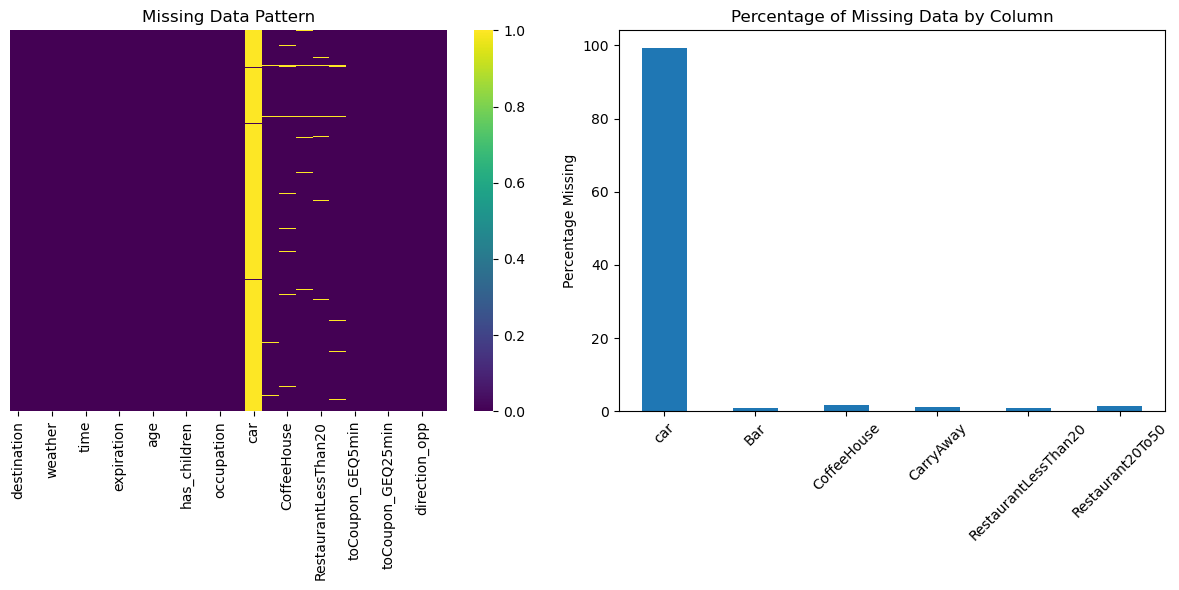


Detailed missing data analysis:
car: 12576 missing (99.15%)
  Unique values: [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']

Bar: 107 missing (0.84%)
  Unique values: ['never' 'less1' '1~3' 'gt8' nan '4~8']

CoffeeHouse: 217 missing (1.71%)
  Unique values: ['never' 'less1' '4~8' '1~3' 'gt8' nan]

CarryAway: 151 missing (1.19%)
  Unique values: [nan '4~8' '1~3' 'gt8' 'less1' 'never']

RestaurantLessThan20: 130 missing (1.02%)
  Unique values: ['4~8' '1~3' 'less1' 'gt8' nan 'never']

Restaurant20To50: 189 missing (1.49%)
  Unique values: ['1~3' 'less1' 'never' 'gt8' '4~8' nan]



In [8]:
# Step 1: Check for missing values
print("Missing values per column:")
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])
print(f"\nTotal missing values: {data.isnull().sum().sum()}")
print(f"Percentage of total data missing: {(data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100:.2f}%")

# Step 2: Visualize missing data patterns
import matplotlib.pyplot as plt
import seaborn as sns

if data.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    
    # Missing data heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Data Pattern')
    
    # Missing data percentage by column
    plt.subplot(1, 2, 2)
    missing_percent = (data.isnull().sum() / len(data)) * 100
    missing_percent = missing_percent[missing_percent > 0]
    if len(missing_percent) > 0:
        missing_percent.plot(kind='bar')
        plt.title('Percentage of Missing Data by Column')
        plt.ylabel('Percentage Missing')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

# Step 3: Analyze missing data by column
print("\nDetailed missing data analysis:")
for column in data.columns:
    missing_count = data[column].isnull().sum()
    if missing_count > 0:
        missing_percent = (missing_count / len(data)) * 100
        print(f"{column}: {missing_count} missing ({missing_percent:.2f}%)")
        
        # Show unique values for categorical columns with missing data
        if data[column].dtype == 'object':
            print(f"  Unique values: {data[column].unique()}")
        print()

## Missing data strategy
### Drop
Given the above results, I will drop the "car" column because it is missing 99% of it's data.

### Replace
The remainder of columns with missing data are all categorical data.  Since less than 2% of data is missing from each of these columns, I will replace missing data with the mode for each column.

In [9]:
# Import our custom data cleaning utilities
from utils.data_cleaning_utils import safe_drop_columns, analyze_missing_data

# Create cleaned_data by dropping the 'car' column (99% missing)
cleaned_data = safe_drop_columns(data, ['car'])

# Analyze missing data in the cleaned dataset
missing_stats = analyze_missing_data(cleaned_data)

print(f"\nDataset shape after cleaning: {cleaned_data.shape}")
print(f"Original shape: {data.shape}")
print(f"Columns removed: {data.shape[1] - cleaned_data.shape[1]}")

Dropping columns: ['car']
=== Missing Data Analysis ===
Total cells in dataframe: 317,100
Missing cells: 794
Percentage of missing data: 0.25%
Complete data percentage: 99.75%

--- Missing Data by Column ---
Bar: 107 (0.8%)
CoffeeHouse: 217 (1.7%)
CarryAway: 151 (1.2%)
RestaurantLessThan20: 130 (1.0%)
Restaurant20To50: 189 (1.5%)

Dataset shape after cleaning: (12684, 25)
Original shape: (12684, 26)
Columns removed: 1


In [13]:
# Clean missing data by replacing NaN with Mode for categorical columns
columns_to_fill = ['Bar', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50', 'CarryAway']

# Create a dictionary of column: mode_value pairs
fill_values = {}
for col in columns_to_fill:
    if col in cleaned_data.columns and cleaned_data[col].isnull().sum() > 0:
        mode_value = cleaned_data[col].mode()[0]
        fill_values[col] = mode_value
        print(f"Filling {col} missing values with mode: {mode_value}")

# Fill all columns at once using fillna with dictionary
cleaned_data.fillna(fill_values, inplace=True)

# Verify no missing values remain in these columns
print(f"\nMissing values after cleaning:")
for col in columns_to_fill:
    if col in cleaned_data.columns:
        missing_count = cleaned_data[col].isnull().sum()
        print(f"{col}: {missing_count} missing values")

print(f"\nTotal missing values in dataset: {cleaned_data.isnull().sum().sum()}")


Missing values after cleaning:
Bar: 0 missing values
CoffeeHouse: 0 missing values
RestaurantLessThan20: 0 missing values
Restaurant20To50: 0 missing values
CarryAway: 0 missing values

Total missing values in dataset: 0


4. What proportion of the total observations chose to accept the coupon?



In [63]:
# Example for your coupon acceptance data
cleaned_data['Y_labels'] = cleaned_data['Y'].map({0: 'Rejected', 1: 'Accepted'})

# print ratio of accepted to rejected coupons
accepted_count = cleaned_data['Y'].sum()
rejected_count = len(cleaned_data) - accepted_count
print(f"\nAccepted Coupons: {accepted_count} ({(accepted_count / len(cleaned_data)) * 100:.2f}%)")
print(f"Rejected Coupons: {rejected_count} ({(rejected_count / len(cleaned_data)) * 100:.2f}%)")
print(f"Total Coupons: {len(cleaned_data)}")
# print ratio of accepted to rejected coupons
print(f"\nRatio of Accepted to Rejected Coupons: {accepted_count / rejected_count:.2f} : 1")



Accepted Coupons: 7210 (56.84%)
Rejected Coupons: 5474 (43.16%)
Total Coupons: 12684

Ratio of Accepted to Rejected Coupons: 1.32 : 1


5. Use a bar plot to visualize the `coupon` column.

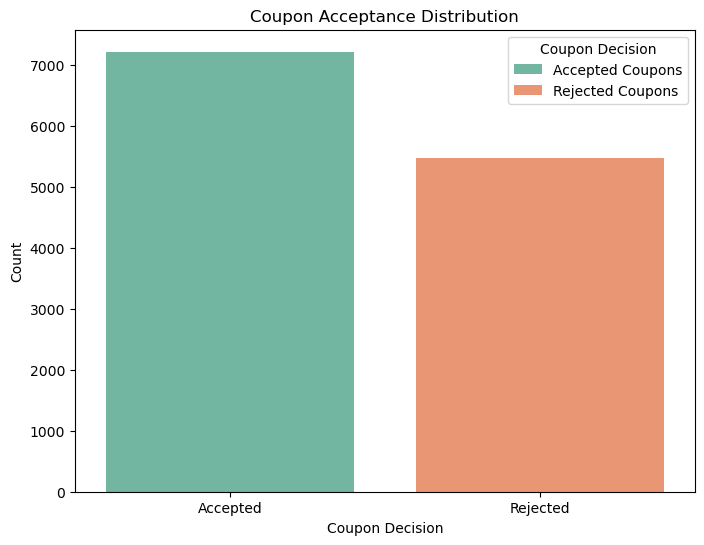

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Y_labels', data=cleaned_data, palette='Set2', hue='Y_labels')
plt.legend(title='Coupon Decision', loc='best',labels=['Accepted Coupons', 'Rejected Coupons'])

plt.title('Coupon Acceptance Distribution')
plt.xlabel('Coupon Decision')
plt.ylabel('Count')
plt.show()



6. Use a histogram to visualize the temperature column.

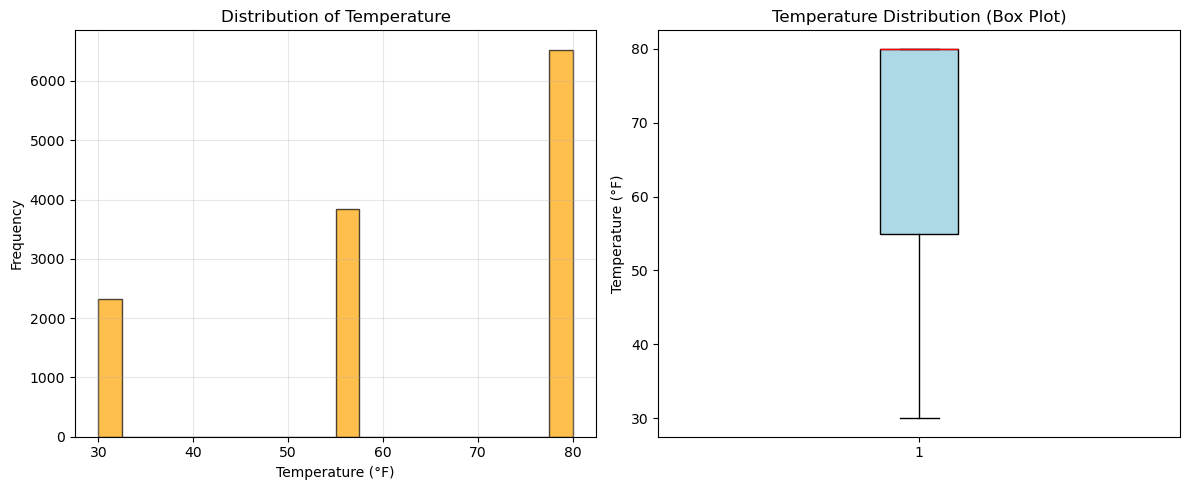

Temperature Statistics:
Mean: 63.3°F
Median: 80.0°F
Standard Deviation: 19.2°F
Range: 30.0°F to 80.0°F
Unique values: [np.int64(30), np.int64(55), np.int64(80)]

Temperature distribution:
  30°F: 2,316 observations (18.3%)
  55°F: 3,840 observations (30.3%)
  80°F: 6,528 observations (51.5%)


In [75]:
# Visualize the temperature column with histogram
plt.figure(figsize=(12, 5))

# Basic histogram
plt.subplot(1, 2, 1)
plt.hist(cleaned_data['temperature'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Box plot for additional insights
plt.subplot(1, 2, 2)
plt.boxplot(cleaned_data['temperature'], vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'),            medianprops=dict(color='red'))
plt.title('Temperature Distribution (Box Plot)')
plt.ylabel('Temperature (°F)')

plt.tight_layout()
plt.show()

# Print temperature statistics
print("Temperature Statistics:")
print(f"Mean: {cleaned_data['temperature'].mean():.1f}°F")
print(f"Median: {cleaned_data['temperature'].median():.1f}°F")
print(f"Standard Deviation: {cleaned_data['temperature'].std():.1f}°F")
print(f"Range: {cleaned_data['temperature'].min():.1f}°F to {cleaned_data['temperature'].max():.1f}°F")
print(f"Unique values: {sorted(cleaned_data['temperature'].unique())}")

# Value counts for temperature
temp_counts = cleaned_data['temperature'].value_counts().sort_index()
print(f"\nTemperature distribution:")
for temp, count in temp_counts.items():
    print(f"  {temp}°F: {count:,} observations ({count/len(cleaned_data)*100:.1f}%)")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  